<a href="https://colab.research.google.com/github/akshayabalan96/Prediction-Of-Heart-Disease-Among-Older-People/blob/main/IE_7275_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## **Data Exploration**

In [ ]:
#upload the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("heart.csv") 
df.head(3)


Saving heart 2.csv to heart 2.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
#Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#check for abnormal values
df[df['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
df = df.drop([48, 281])

In [ ]:
#Describe the dimensions of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [ ]:
df[df['target'] == 0].count()

age         137
sex         137
cp          137
trestbps    137
chol        137
fbs         137
restecg     137
thalach     137
exang       137
oldpeak     137
slope       137
ca          137
thal        137
target      137
dtype: int64

In [ ]:
#Describe the data
temp = df[['age','trestbps','chol','thalach','oldpeak']]
temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,301.0,54.378738,9.110950,29.0,47.0,56.0,61.0,77.0
trestbps,301.0,131.647841,17.594002,94.0,120.0,130.0,140.0,200.0
chol,301.0,246.504983,51.915998,126.0,211.0,241.0,275.0,564.0
thalach,301.0,149.740864,22.891031,71.0,134.0,153.0,166.0,202.0
oldpeak,301.0,1.043189,1.163384,0.0,0.0,0.8,1.6,6.2


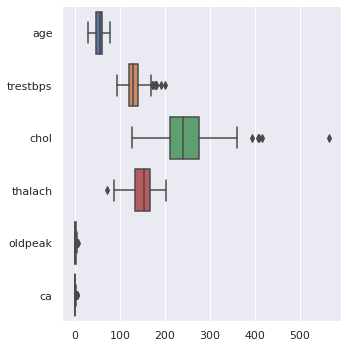

In [ ]:
#Check for outliers
numerical_varibales = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
#ax = sns.boxplot(data=[df['age'],df['trestbps'],df['chol'], df['thalach'], df['oldpeak'], df['ca']], palette="Set2")  
sns.catplot(data=numerical_varibales, orient="h", kind="box")             

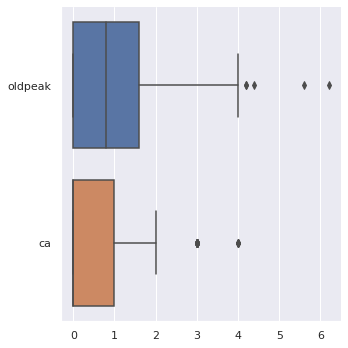

In [ ]:
sns.set(rc={'figure.figsize':(10,8.27)})
#ax = sns.boxplot(data=[df['oldpeak'], df['ca']]) 
enlarged_data = df[['oldpeak', 'ca']]
sns.catplot(data=enlarged_data, orient="h", kind="box")             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


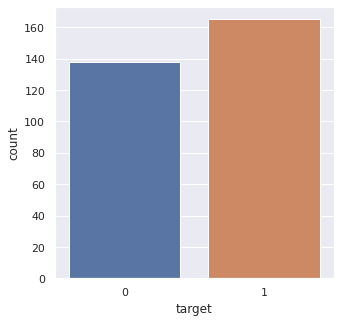

In [ ]:
# check for imbalanced data
plt.figure(figsize=(5,5))
sns.countplot(df.target)
plt.show()

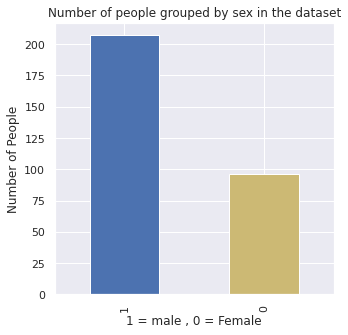

In [ ]:
#Calculate how many males and how many females are there in the dataset
plt.figure(figsize=(5,5))
df['sex'].value_counts().plot(kind='bar',color = ['b','y'])
plt.xlabel("1 = male , 0 = Female")
plt.ylabel("Number of People")
plt.title("Number of people grouped by sex in the dataset")
plt.show()

<Figure size 360x360 with 0 Axes>

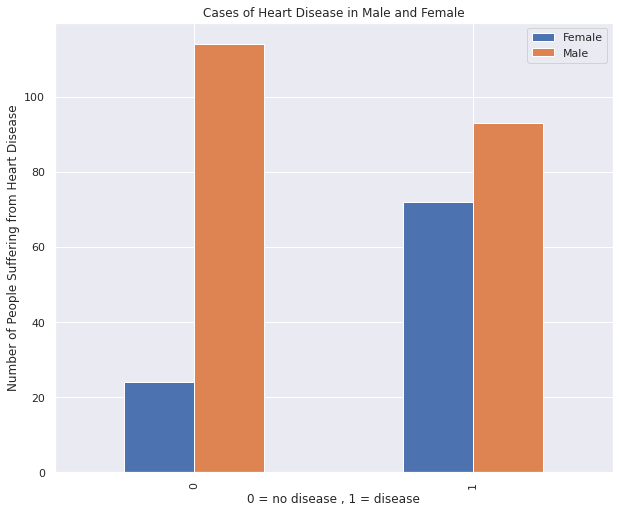

In [ ]:
# Number of heart disease cases in male and female

positive_cases = df[df['target'] == 1]
male_cases = positive_cases[positive_cases['sex']== 1].sum()['target']
female_cases = positive_cases[positive_cases['sex']== 0].sum()['target']

x_axis = ['Male', 'Female']
y_axis = [male_cases, female_cases]
#plt.bar(x_axis, y_axis, width = 0.4)
plt.figure(figsize=(5,5))
pd.crosstab(df.target, df.sex).plot(kind='bar')

plt.legend(["Female","Male"])
plt.xlabel("0 = no disease , 1 = disease")
plt.ylabel("Number of People Suffering from Heart Disease")
plt.title("Cases of Heart Disease in Male and Female")
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


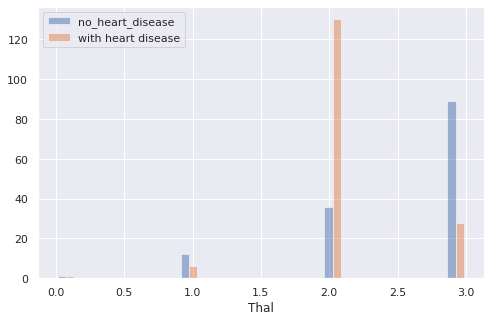

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


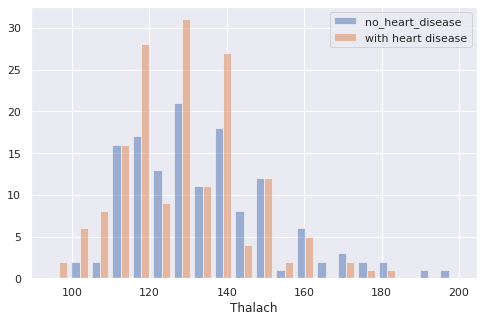

In [ ]:
plt.figure(figsize=(8,5))
plt.hist([df[df.target==0].thal, df[df.target==1].thal], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.legend()
plt.xlabel("Thal")
plt.show()
plt.figure(figsize=(8,5))
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.legend()
plt.xlabel("Thalach")
plt.show()


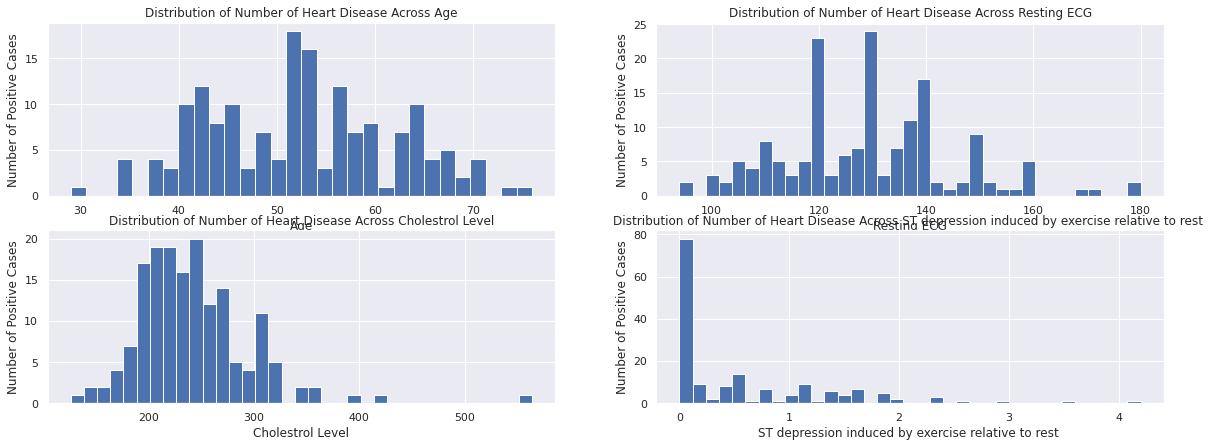

In [ ]:
#Distribution of Number of Heart Disease Across Age
fig = plt.figure(figsize = (20, 7))
plt.subplot(2,2,1)
plt.xlabel('Age')
plt.ylabel('Number of Positive Cases')
plt.title('Distribution of Number of Heart Disease Across Age')
plt.hist(positive_cases['age'], density=False, bins=30)  
plt.subplot(2,2,2)
plt.xlabel('Resting ECG')
plt.ylabel('Number of Positive Cases')
plt.title('Distribution of Number of Heart Disease Across Resting ECG')
plt.hist(positive_cases['trestbps'], density=False, bins=35) 
plt.subplot(2,2,3)
plt.xlabel('Cholestrol Level')
plt.ylabel('Number of Positive Cases')
plt.title('Distribution of Number of Heart Disease Across Cholestrol Level')
plt.hist(positive_cases['chol'], density=False, bins=35)  
plt.subplot(2,2,4)
plt.xlabel('ST depression induced by exercise relative to rest ')
plt.ylabel('Number of Positive Cases')
plt.title('Distribution of Number of Heart Disease Across ST depression induced by exercise relative to rest ')
plt.hist(positive_cases['oldpeak'], density=False, bins=35)  

plt.locator_params(axis='y', integer=True)

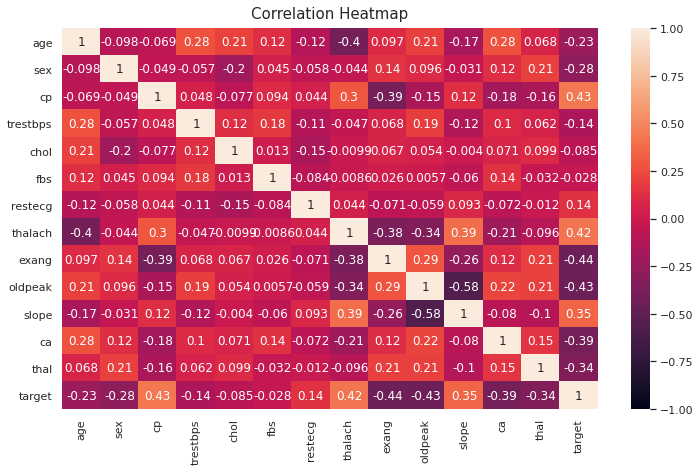

In [ ]:
# Correlation matrix for each pair of variables
fig = plt.figure(figsize = (12, 7))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=10);

## **Model Selection**

Among the different models present, we narrowed down our search to 2 models namely, Knn and Logistic Regression as they work well with our dataset. Although Naive Bayes is a good classifier, our dataset does not have enough records to compliment it. From the below two models, we see that Logistic Regression outperforms Knn for this particular dataset.

**1) Knn model**

First m dummies are created for categorical variables. The numerical variables are then standardized in the same range.
Cross Validation was chosen to pick the right value of k and calculate accuracy of the model since it negates partition bias on small dataset.


In [ ]:
#upload the dataset
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("heart.csv") 
df.head(3)

Saving heart.csv to heart (1).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [ ]:
df = df.drop([48, 281])

In [ ]:
#Split the data into features and target
y = df["target"]
X = df.drop("target",axis=1)
#Creating m dummies for categorical variables for knn
x1 = pd.get_dummies(X['cp'], prefix = "cp")
x2 = pd.get_dummies(X['thal'], prefix = "thal")
x3 = pd.get_dummies(X['slope'], prefix = "slope")
x4 = pd.get_dummies(X['restecg'], prefix = "restecg")
temp = [X, x1, x2, x3, x4]
X = pd.concat(temp, axis = 1)
X = X.drop(columns = ['restecg', 'cp', 'thal', 'slope'])
X_nb = X
X.shape

(301, 22)

In [ ]:
#Rescale the numerical data
from sklearn.preprocessing import StandardScaler
def stnd_scalar(scaled_features,col_names):  
  features = scaled_features[col_names]
  scaler = StandardScaler().fit(features.values)
  features = scaler.transform(features.values)
  scaled_features[col_names] = features
  return scaled_features
col_names = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
df = stnd_scalar(X,col_names)
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,0.947829,1,0.760168,-0.260565,1,0.011339,0,1.082105,0,0,0,0,1,1,0,0,1,0,0,1,0,0
1,-1.910633,1,-0.093815,0.067433,0,1.630385,0,2.115297,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,-1.470869,0,-0.093815,-0.820090,0,0.974015,0,0.307211,0,0,1,0,0,0,1,0,0,0,1,1,0,0
3,0.178243,1,-0.663137,-0.202683,0,1.236563,0,-0.209384,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,0.288184,0,-0.663137,2.074005,0,0.580193,1,-0.381583,0,1,0,0,0,0,1,0,0,0,1,0,1,0


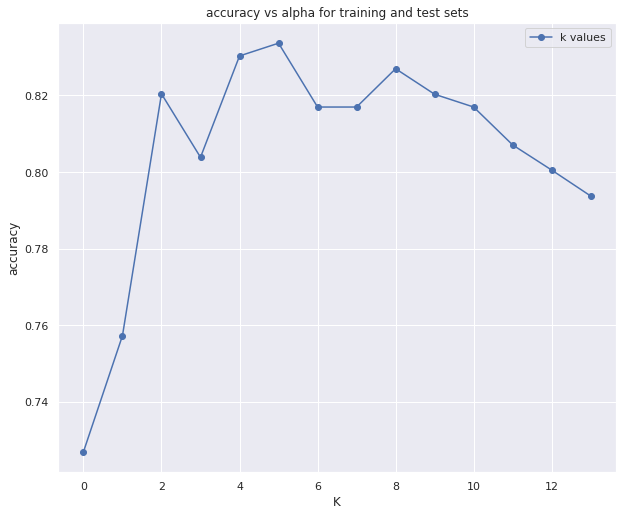

[0.7269892473118279, 0.7573118279569891, 0.8204301075268818, 0.8038709677419356, 0.8303225806451613, 0.8336559139784946, 0.816989247311828, 0.816989247311828, 0.8269892473118279, 0.8203225806451613, 0.816989247311828, 0.8070967741935485, 0.8005376344086022, 0.793763440860215]
We pick k=5. Although k=6 has higher accuracy, we go with choosing the odd number.
The accuracy of knn model is 0.8303225806451613
The recall of knn model is 0.8588235294117647
The precision of the model is  0.8364939309056956
The f1-score of the model is  0.8454493148610795


In [ ]:
#Using knn with cross validation for parameter tuning and model selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#Finding the right k

k_range = range(1, 15)
# empty list to store scores
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
fig,ax = plt.subplots()
ax.set_xlabel("K")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and test sets")
ax.plot(k_scores,marker="o",label="k values")
ax.legend()
plt.show()
print(k_scores)
print("We pick k=5. Although k=6 has higher accuracy, we go with choosing the odd number.")

# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print("The accuracy of knn model is",cross_val_score(knn, df, y, cv=10, scoring='accuracy').mean())
print("The recall of knn model is",cross_val_score(knn, df, y, cv=10, scoring='recall').mean())
print("The precision of the model is ", cross_val_score(knn, df, y, cv=10, scoring='precision').mean())
print("The f1-score of the model is ", cross_val_score(knn, df, y, cv=10, scoring='f1').mean())


**2) Logistic Regression**

First M dummies are created and then the numerical variables are standardized in the same range. The accuracy of the model is calculated using cross validation methods. 

In [ ]:
# Logistic Regression 
# Convert catagorical variables to m-1 dummies
from sklearn.linear_model import LogisticRegression
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("heart.csv")
df.head()

Saving heart 2.csv to heart 2 (1).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df = df.drop([48, 281])


In [ ]:
df.count()

age         301
sex         301
cp          301
trestbps    301
chol        301
fbs         301
restecg     301
thalach     301
exang       301
oldpeak     301
slope       301
ca          301
thal        301
target      301
dtype: int64

In [ ]:
df_dummy = pd.get_dummies(df, columns=['cp', 'thal', 'slope', 'restecg'], drop_first=True)
df_dummy.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,1,0,0,1,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,1,0,0,1,1,0


In [ ]:
# Rescale numerical variables
from sklearn.model_selection import train_test_split
def stnd_scalar(scaled_features,col_names):  
  features = scaled_features[col_names]
  scaler = StandardScaler().fit(features.values)
  features = scaler.transform(features.values)
  scaled_features[col_names] = features
  return scaled_features
col_names = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
df_scaled = stnd_scalar(df_dummy,col_names)
df_scaled.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_2,thal_3,slope_1,slope_2,restecg_1,restecg_2
0,0.947829,1,0.760168,-0.260565,1,0.011339,0,1.082105,0,1,0,0,1,0,0,0,0,0,0
1,-1.910633,1,-0.093815,0.067433,0,1.630385,0,2.115297,0,1,0,1,0,1,0,0,0,1,0
2,-1.470869,0,-0.093815,-0.820090,0,0.974015,0,0.307211,0,1,1,0,0,1,0,0,1,0,0
3,0.178243,1,-0.663137,-0.202683,0,1.236563,0,-0.209384,0,1,1,0,0,1,0,0,1,1,0
4,0.288184,0,-0.663137,2.074005,0,0.580193,1,-0.381583,0,1,0,0,0,1,0,0,1,1,0


In [ ]:
import statsmodels.api as sm
y = df_scaled['target']
X = df_scaled.drop('target', axis=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.337285
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  301
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           17
Date:                Thu, 21 Oct 2021   Pseudo R-squ.:                  0.5106
Time:                        14:54:13   Log-Likelihood:                -101.52
converged:                       True   LL-Null:                       -207.42
Covariance Type:            nonrobust   LLR p-value:                 1.198e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0113      0.213      0.053      0.958      -0.406       0.428
sex           -1.1927      0.

In [ ]:
# Cross Validation for Logistics Regression dropping variables 'thal' and 'thalach'
df_scaled_temp = df_scaled
y = df_scaled_temp['target']
x = df_scaled_temp.drop(['target','thal_2','thal_3','thalach'], axis=1)

logreg = LogisticRegression()
print("The accuracy of the model is ",cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())
print("The recall of the model is ", cross_val_score(logreg, x, y, cv=10, scoring='recall').mean())
print("The precision of the model is ", cross_val_score(logreg, x, y, cv=10, scoring='precision').mean())

The accuracy of the model is  0.8104301075268816
The recall of the model is  0.8341911764705883
The precision of the model is  0.8280056759545923


In [ ]:
# Cross Validation for Logistics Regression including dropping variables 'thal' and 'thalach'

y = df_scaled['target']
x = df_scaled.drop('target', axis=1)

logreg = LogisticRegression()
print("The accuracy of the model is ",cross_val_score(logreg, x, y, cv=10, scoring='accuracy').mean())
print("The recall of the model is ", cross_val_score(logreg, x, y, cv=10, scoring='recall').mean())
print("The precision of the model is ", cross_val_score(logreg, x, y, cv=10, scoring='precision').mean())
print("The f1-score of the model is ", cross_val_score(logreg, x, y, cv=10, scoring='f1').mean())



The accuracy of the model is  0.8403225806451614
The recall of the model is  0.8764705882352942
The precision of the model is  0.8428197945845005
The f1-score of the model is  0.8549160237395531
